# Double Integration Over General Regions
As seen in the last [article](../double_integration_rectangular/double_integration_rectangular.html), we can use double integration to find the volume of an object, assuming that the object is rectangular around its perimiter. While we can double integrate over a rectangle in a fairly clean fashion, we can also perform double integration over a more general region in a fairly similar manner, but with some minor differences.

### Riemann Sum Definition

In order to compute a Riemann Sum for a function over a general region, we need to create a partition, usually denoted as $P$, of the region. When we try toextend double integration to general regions, we can run into some issues. For example, let's consider the case where we're trying to create a partition for a circle by packing a finite number of rectangles in it:

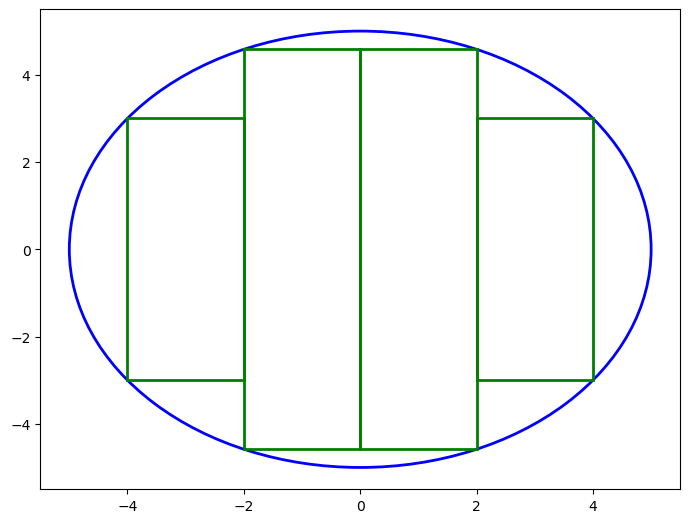

In [56]:
from matplotlib import pyplot, patches
import numpy
import math

fig = pyplot.figure()
ax = fig.add_axes([0,0,1,1])

circle = patches.Circle((0,0), radius=5, linewidth=2, edgecolor='b', facecolor='none')
# use pythagorean theorem to calculate heights/y values of the rectangles
rect1 = patches.Rectangle((-2, -math.sqrt(5**2 - 2**2)), 2, 2 * math.sqrt(5**2 - 2**2), linewidth=2, edgecolor='g', facecolor='none')
rect2 = patches.Rectangle((0, -math.sqrt(5**2 - 2**2)), 2, 2 * math.sqrt(5**2 - 2**2), linewidth=2, edgecolor='g', facecolor='none')
rect3 = patches.Rectangle((-4, -math.sqrt(5**2 - 4**2)), 2, 2 * math.sqrt(5**2 - 4**2), linewidth=2, edgecolor='g', facecolor='none')
rect4 = patches.Rectangle((2, -math.sqrt(5**2 - 4**2)), 2, 2 * math.sqrt(5**2 - 4**2), linewidth=2, edgecolor='g', facecolor='none')

ax.add_patch(circle)
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)

# plot a single point so the patches will actually show up
ax.plot(0,0)
fig.show()

There are a couple things to note here. All of the rectangles are completely within the region $R$, which is required by the definition of the partition. This does leave some extra room. However, when we start using limits to squeeze the area of the rectangles, this matters less and less because the empty space fills up. Let's look at the partial sum for a partition with $k$ rectangles:
$$S_n = \sum_{k=1}^{n}f(x_k,y_k)\Delta A_k$$
This is the nth partial Riemann sum. In this case, we're iterating over the rectangles. $\Delta A_k$ is the area of the kth rectangle, and $(x_k,y_k)$ is a point that lies within the kth rectangle. Before we look at the limit, we need to understand what the norm of the partition:
$$\left \lVert P \right \rVert$$
is. The norm of the partition is simply defined as the largest area of the set of rectangles in the partition. If we take the limit of the partial sum as the norm of the partition $\left \lVert P \right \rVert$ goes to zero, we end up with the following:
$$\lim_{\left \lVert P \right \rVert \to 0} \sum_{k=1}^{n}f(x_k,y_k)\Delta A_k = \iint_{R} f(x_k,y_k)dA$$
There is one main difference from the notation used in the article for rectangular regions, namely the fact that we're allowing the area of each rectangle to vary. This wasn't a strict condition in the last article, just a simplification for the intuition into the definition. With general regions it is much more useful to allow for variable rectangle areas, but it still shouldn't be strictly necessary.

### A Stronger Form of Fubini's Theorem
The version of Fubini's Theorem covered in the previous article is great, but that statement of the theorem didn't cover the case where we wanted to have integrals that have non-constant limits of integration, which as we will see in a moment, is necessary for describing the objects that we want to. There are two cases:

1. The case where $R$ is defined by the inequalities $a \le x \le b$ and $g_1(x) \le y \le g_2(x)$. We are also making the assummption that $g_1(x)$ and $g_2(x)$ are continuous over $[a,b]$. If these conditions hold, then we can make the following statement:
$$\iint_{R}f(x,y)dA = \int_{a}^{b}\int_{g_1(x)}^{g_2(x)}f(x,y)dydx$$
2. The case where $R$ is defined by the inequalities $c \le y \le d$ and $h_1(y) \le x \le h_2(y)$. Again, we're assuming that $h_1(y)$ and $h_2(y)$ are continuous over $[c,d]$. These are the exact same conditions as the last case, except instead of bounding $x$ with constants, we're bounding $y$ with constants. Assuming these preconditions hold, we can make the following statement:
$$\iint_{R}f(x,y)dA = \int_{c}^{d}\int_{h_1(y)}^{h_2(y)}f(x,y)dxdy$$
The double integral over $f(x,y)$ is equal to both of these formulas, which can become important when later when it might be extremely difficult or impossible (especially when limited to elementary functions) to integrate in one way whereas the other way is possible.

### Volumes of Objects that do not Intersect with the XY Plane in a Rectangle
Now that we've seen the definition of the double integral over general regions, we can now start applying it to real world problems. The most clear application of this is volume. Let's say we want to calculate the volume of $f(x,y)=-x^2-y^2+1$ when $f(x,y)>0$. The graph of this function looks like the following:

(50, 20)
(50, 20)
(50, 20)


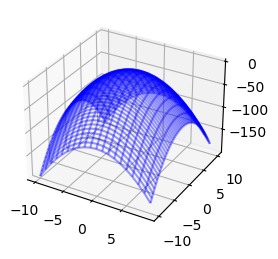

In [22]:
# Matplotlib code to draw the function above
import numpy

x = numpy.arange(-10, 10)
y = numpy.linspace(-10, 10)

x, y = numpy.meshgrid(x, y)

zlambda = lambda x, y: -(x ** 2) - (y ** 2) + 1
zfun = numpy.vectorize(zlambda)

z = zfun(x,y)

fig = pyplot.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_wireframe(x, y, z, color='b', alpha=0.4)
fig.show()

We know that this function intersects with the XY plane at the circle $x^2+y^2=1$, and we can even write functions to determine x or y given the other. ie:
$$y=\pm \sqrt{1-x^2}$$
$$x=\pm \sqrt{1-y^2}$$
However, this still leaves the question of how we actually set up the double integration for this problem. Just saying we're going to integrate over the region $R$:
$$\iint_{R}(-x^2-y^2+1)dA$$
is a good first step, but it doesn't get us very far. However, using Fubini's theorem, we can transform this integral into something that we can actually integrate over. Let's say we want to have our first integral work over $x$, and the second one work operate over $y$. We know that our boundary curves are $y = \pm \sqrt{1-x^2}$, and we know that our limits of integration for the $x$ are $-1$ and $1$. In the form of an expression:
$$\iint_{R}(-x^2-y^2+1)dA=\int_{-1}^{1}\int_{-\sqrt{1-x^2}}^{\sqrt{1-x^2}}(-x^2-y^2+1)dydx$$
Evaluation of this integral is currently left to the reader (It's not particularly pretty).

### An Intuitive Method of Deriving This Result
While we can just go along and evaluate integrals using Fubini's theorem, this doesn't really give as an intuition into why this is the case. Enter: slicing. Let's say we take the same function and turn it into a bunch of slices (only a couple slices are shown here):

Text(0.5, 0.5, 'x')

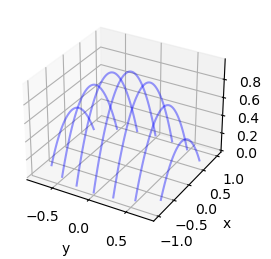

In [53]:
startx = -0.75
deltax = 0.25
xslices = 7

fig = pyplot.figure()
ax = fig.add_subplot(1, 2, 1, projection='3d')

for i in range(0, 7):
    currentxSingle = -0.75 + deltax * i
    currentx = numpy.full((50, 1), currentxSingle)
    yOneSide = math.sqrt(1 - (currentxSingle ** 2))
    currenty = numpy.expand_dims(numpy.linspace(-yOneSide, yOneSide), 1)
    currentz = zfun(currentx, currenty)
    ax.plot_wireframe(currentx, currenty, currentz, color='b', alpha=0.4)
ax.set_xlabel('y')
ax.set_ylabel('x')

What we can do in order to approximate the integral is find the area under each of these slices individually and then integrate over them. To find the area of an individual slice, we simply integrate the function:
$$\int_{a}^{b}(-x^2-y^2+1)dx$$
Now that we know the area under a single slice, we need to find the volume of the whole object. We can do this using a sum. If we have $k$ slices over the interval $[c,d]$, and the width of each slice is $\Delta k$, the sum looks like the following:
$$\sum_{n=1}^{k}\left ( \int_{a_k}^{b_k}(-x^2-y^2+1)dx\right )\Delta k$$
Now if we really want to find the true volume of this, we can't just sum over a finite number of slices. We need to do the sum over an infinite number of slices. Fortunately, we have a way of turning sums written like the one above into integrals:
$$\sum_{n=1}^{k}\left ( \int_{a_k}^{b_k}(-x^2-y^2+1)dx\right )\Delta k = \int_{c}^{d} \int_{h_1(y)}^{h_2(y)}f(x,y)dxdy$$
Note that we also changed the interval of the limits of integration of the inner integral from $[a_k, b_k]$ to $[h_1(y), h_2(y)$. If we plug in the values that we were using above, namely the fact that we're integrating over the interval $[-1,1]$ on the y-axis and from $[-\sqrt{1-y^2},\sqrt{1-y^2}]$ on the x-axis, we get the following:
$$\int_{-1}^{1} \int_{-\sqrt{1-y^2}}^{\sqrt{1-y^2}} (-x^2-y^2+1)dxdy$$
We know that this is equivalent to the integral in the section above due to Fubini's theorem even though we're integrating in the opposite order.

### Properties of Double Integrals
Double integrals have some properties that can be useful during evaluation similar to normal integrals:
1. Constant Multiple
$$\iint_{R}cf(x,y)dA = c\iint_{R}f(x,y)dA$$
2. Sum
$$\iint_{R}(f(x,y) + g(x,y))dA = \iint_{R}f(x,y)dA + \iint_{R}g(x,y)dA$$
3. Difference
$$\iint_{R}(f(x,y) - g(x,y))dA = \iint_{R}f(x,y)dA - \iint_{R}g(x,y)dA$$
4. Domination
$$ f(x,y) \ge 0 \quad \text{on} \quad R \implies \iint_{R}f(x,y)dA \ge 0$$
$$ f(x,y) \ge g(x,y) \quad \text{on} \quad R \implies \iint_{R}f(x,y)dA \ge \iint_{R}g(x,y)dA$$
5. Additivity - If there are two regions, $R_1$ and $R_2$, whose unions form the region $R$, the following transformation is correct:
$$\iint_{R}f(x,y)dA = \iint_{R_1}f(x,y)dA + \iint_{R_2}f(x,y)dA$$

All of these formulas are consequences of the way series work since these integrals are essentially just infinite series. For example for the first part of the domination property, if we look at the following sum:
$$\sum_{k=1}^{n}a_n$$
And we can guarantee that $a_n \ge 0$, we know that the sum will always be positive, just like how the double integral over an always positive function will be positive.

### Example 1
Let's say we want to calculate the volume of the following function over the triangle in the XY plane defined by the points $(0,0)$, $(1,0)$, and $(1,1)$:
$$f(x,y)=\frac{\sin{x}}{x}$$
Given this, what we want to do is calculate the following double integral:
$$\iint_{R}\frac{\sin{x}}{x}dA$$
So first, let's define $R$. Given the points that we have, $R$ is bounded by the lines $y=0$ $x=1$, and $y=x$. Now that we have the boundaries, let's  try integrating over the slices as in the following diagram (the red rectangles are the slices):

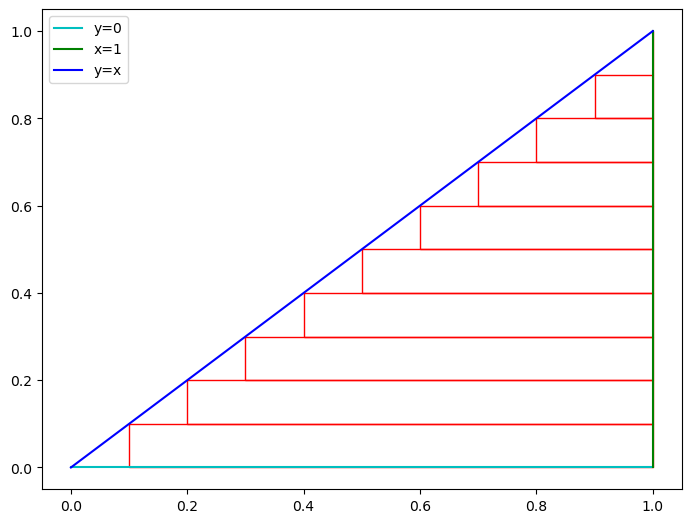

In [52]:
#matplotlib code to 2d draw the triangle
fig = pyplot.figure()
ax = fig.add_axes([0,0,1,1])

ax.plot([0,1], [0,0], color='c', label='y=0')
ax.plot([1,1], [0,1], color='g', label='x=1')
ax.plot([0,1], [0,1], color='b', label='y=x')

num_rects = 10
for i in range(0, num_rects):
    rect = patches.Rectangle(((i + 1) / num_rects, i / num_rects), (num_rects - i - 1) / num_rects, 1 / num_rects, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

ax.legend(loc='best')

This means that we'll be integrating over $[0,1]$ on the y-axis and over $[y,1]$ on the x-axis. Writing this as an integral looks like the following:
$$\int_{0}^{1}\int_{y}^{1}\frac{\sin{x}}{x}dxdy$$
We need to evaluate the inner integral first:
$$\int_{y}^{1}\frac{\sin{x}}{x}dx$$
However, this presents a problem. We can't integrate this function (at least using elementary functions). Let's try integrating in the opposite order. This means we'll be integrating over $[0,1]$ on the x-axis and $[0,x]$ on the y-axis. As an integral:
$$\int_{0}^{1}\int_{0}^{x}\frac{\sin{x}}{x}dydx$$
Starting off with the inner integral, we see this can be done relatively easily:
$$\int_{0}^{x}\frac{\sin{x}}{x}dy=\left [ \frac{\sin{x}}{x}y \right ]_{y=0}^{y=x}$$
$$\implies \frac{\sin{x}}{x}(x) - \frac{\sin{x}}{x}(0)$$
$$\implies \sin{x}$$
Now that we have the value for the inner integral, we can plug it into the outer integral:
$$\int_{0}^{1}\sin{x}dx$$
$$\implies -\cos{x} \big \rvert_{x=0}^{x=1}$$
$$\implies -\cos{1} - (-\cos{0})$$
$$\implies -\cos{1} + 1 \approx 0.46$$
Note that we can evaluate this double integral over this region in one way and not the other. That's a very important point, since although Fubini's theorem does guarantee that both of the integrals will be equal to each other, that doesn't necessarily mean both of them will be easily computed analytically.